<a href="https://colab.research.google.com/github/orcunmadran/hu-bby261-2020/blob/main/MNIST_Digit_EY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow MNIST Digit
**Orjinal Makale:** Image Classification in 10 Minutes with MNIST Dataset

**Makale URL:** https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

In [1]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


0


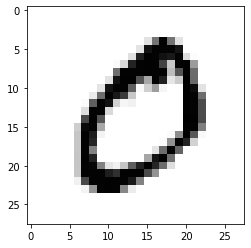

In [2]:
import matplotlib.pyplot as plt
image_index = 1 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 0
plt.imshow(x_train[image_index], cmap='Greys')

In [3]:
print(x_train[image_index])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [7]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [8]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2045 - accuracy: 0.9387
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0838 - accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0419 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0355 - accuracy: 0.9884
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0246 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0207 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0201 - accuracy: 0.9931
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0574 - accuracy: 0.9857


[0.05739245563745499, 0.9857000112533569]

#Veri Seti Haricinde Dışarıdan PNG Kullanımı

MNIST veri setinde yer alan 10.000 test görseli haricinde dışarıdan kendi yükleyeceğimiz PNG dosyalarını aşağıdaki kod bloğu yardımıyla kullanabiliriz.

Aşağıdaki kod bloğunu çalıştırmadan önce örnek dosyalarımızın yer aldığı Google Drive klasörünü bu not defterine bağlamamız (mount) gerekiyor. Bu işlemi sol menüde yer alan "Files" sekmesinden gerçekleştiriyoruz. "Files" sekmesi altında yer alan "Google Drive" klasör ikonuna tıklayarak bağlanma işlemini gerçekleştiriyoruz ve kullanacağımız dosyayı klasörler içinde bularak dosyaya ulaşılacak yol bilgisini dosyanın üzerine sağ tıklayarak "Copy Path" komutuyla alıyoruz ve kod bloğu içinde kullanıyoruz.

[[0.00000000e+00 1.30006805e-08 0.00000000e+00 0.00000000e+00
  1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
[4]


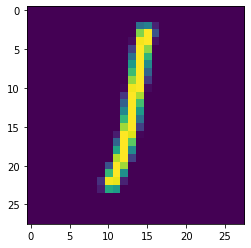

In [19]:
#PNG "/content/drive/My Drive/Colab Notebooks/HU-BBY261-2020/ML_MNIST_Digit/Ornekler/MNIST_Sample_01.png"

from PIL import Image
import numpy as np

png = Image.open("/content/drive/My Drive/Colab Notebooks/HU-BBY261-2020/ML_MNIST_Digit/Ornekler/MNIST_Sample_01.png").convert("L")
png = np.resize(png, (28,28,1))
pngBinary = np.array(png)
plt.imshow(pngBinary.reshape(28, 28))

tahminDizi = model.predict(pngBinary.reshape(1, 28, 28, 1))
#tahminSayi = model.predict_classes(pngBinary.reshape(1, 28, 28, 1)) // Ocak 2021'de devreden çıkıyormuş.
tahminSayi = np.argmax(model.predict(pngBinary.reshape(1, 28, 28, 1)), axis=-1)

print(tahminDizi)
print(tahminSayi)
